In [2]:
import numpy as np # library to handle data in a vectorized manner
!pip install geopy
import geopy
import numpy as np  
import pandas as pd
import seaborn as sns
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

import json # library to handle JSON files
import folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [7]:
df = pd.read_csv("Chicago_Crime_Data-v2.csv") 
df



,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"
5,7732712,HS540106,09/29/2010 07:59:00 AM,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,1323,12,27.0,24.0,6,1171668.0,1905607.0,2010,02/10/2018 03:50:01 PM,41.896447,-87.644939,"(41.896446772, -87.644938678)"
6,10769475,HZ534771,11/30/2016 01:15:00 AM,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,False,False,1713,17,33.0,14.0,6,1154133.0,1933314.0,2016,02/10/2018 03:50:01 PM,41.972845,-87.708600,"(41.972844913, -87.708600079)"
7,4494340,HL793243,12/16/2005 04:45:00 PM,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,213,2,3.0,38.0,6,1180448.0,1879234.0,2005,02/28/2018 03:56:25 PM,41.823880,-87.613504,"(41.823879885, -87.613503857)"
8,3778925,HL149610,01/28/2005 05:00:00 PM,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,False,False,2211,22,19.0,72.0,6,1160129.0,1838040.0,2005,02/28/2018 03:56:25 PM,41.711281,-87.689179,"(41.711280513, -87.689179097)"
9,3324217,HK361551,05/13/2004 02:15:00 PM,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,False,False,1733,17,35.0,21.0,6,1153590.0,1921084.0,2004,02/28/2018 03:56:25 PM,41.939296,-87.710923,"(41.939295821, -87.710923442)"


Import the 2018 DataSet
The full dataset, 2001 to 2018 contains over 6.7M rows. This makes processing the dataset difficult and time consuming. Only the 2018 data, 187222 records, will be used. In addition, the following clean-up steps are required:

Not all of the columns are required. The following columns are removed:
IUCR
ARREST
DOMESTIC
BEAT
WARD
FBI CD
X COORDINATE
Y COORDINATE
LOCATION

In [9]:
# These are the columns that we want to keep.
# Columns not listed here won't be imported, speeding things up.
crime_keep_columns = ['CASE_NUMBER',
                      'DATE',
                      'BLOCK', 
                       'DESCRIPTION',
                      'WARD',
                      'LATITUDE',
                      'LONGITUDE']

# Download csv
# !wget -O crimes.csv https://data.cityofchicago.org/api/views/x2n5-8w5q/rows.csv?accessType=DOWNLOAD

# Read from local
df = pd.read_csv('Chicago_Crime_Data-v2.csv',
                 usecols=crime_keep_columns)

In [10]:
df.shape

(533, 7)

In [11]:
df.head()

,CASE_NUMBER,DATE,BLOCK,DESCRIPTION,WARD,LATITUDE,LONGITUDE
0,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,FROM BUILDING,14.0,41.807441,-87.703956
1,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,$500 AND UNDER,27.0,41.898280,-87.716406
2,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,$500 AND UNDER,3.0,41.815933,-87.624642
3,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,FINANCIAL ID THEFT: OVER $300,7.0,41.743665,-87.562463
4,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,$500 AND UNDER,15.0,41.773455,-87.706480




Last Rows


In [13]:

df.tail()

,CASE_NUMBER,DATE,BLOCK,DESCRIPTION,WARD,LATITUDE,LONGITUDE
528,HZ192829,03/01/2016 12:00:00 AM,028XX E 79TH ST,INVOLUNTARY SERVITUDE,7.0,41.751885,-87.554826
529,HZ133234,01/29/2016 03:30:00 PM,006XX W HARRISON ST,FOID - REVOCATION,2.0,41.874363,-87.643013
530,HJ747227,11/08/2003 04:54:15 PM,012XX W 81ST ST,AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY,21.0,41.746852,-87.653941
531,JA143710,02/06/2017 01:20:00 PM,009XX N KARLOV AVE,NOTIFICATION OF CIVIL NO CONTACT ORDER,37.0,41.897895,-87.728622
532,G021609,01/11/2001 02:30:41 AM,087XX S ESCANABA AV,DOMESTIC VIOLENCE,NaN,41.736176,-87.554320


<b>Clean up the data and prepare</b>

The sample data file was downloaded in the middle of September. So half of September of 2017 was missing and half of September 2018 was not yet populated. To simply resolve this the raw data was altered to move the September 2017 dates to September 2018.

Now that the data has been imported it needs to be cleaned.

Move September 2017 dates to September 2018
Clean up the column names:
Strip leading & trailing whitespace
Replace multiple spaces with a single space

Remove # characters
Replace spaces with _
Convert to lowercase
Change the date of occurance field to a date / time object
Add new columns for:
Hour
Day
Month
Year
etc.
Split Block into zip_code and street
Verify that all rows have valid data

In [16]:
# Strip leading & trailing whitespace
df.columns = df.columns.str.strip()

# Replace multiple spaces with a single space
df.columns = df.columns.str.replace('\s{2,}', ' ')

# Replace # with blank
df.columns = df.columns.str.replace('#', '')

# Replace spaces with _
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

# Move September 2017 dates to September 2018
df.date.replace(to_replace="(09/\\d+)/2017", value=r"\1/2018", regex=True, inplace=True)

In [17]:
df.dtypes

case_number     object
date            object
block           object
description     object
ward           float64
latitude       float64
longitude      float64
dtype: object

In [19]:
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')

Add new columns for the hour, day, month and year of the crime:

Hour
Day Name
Day of week (Tuesday is the first day)
Month Name
Month Number
Year
Year and Month

In [21]:
df['hour'] = df['date'].dt.hour
df['day_name'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.dayofweek + 1
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['year_month'] = df['date'].dt.to_period('M')

Split Block into zip_code and street

In [22]:
df['zip'] = df.block.str.split(' ').str[0]
df['street'] = df.block.str.split(' ').str[1:].apply(', '.join)

Verify that all rows have valid data

In [23]:
df.isna().sum()

case_number     0
date            0
block           0
description     0
ward           43
latitude        4
longitude       4
hour            0
day_name        0
day             0
month_name      0
month           0
year            0
year_month      0
zip             0
street          0
dtype: int64

In [24]:
df.dropna(inplace=True)
df.reindex()
df.head()

,case_number,date,block,description,ward,latitude,longitude,hour,day_name,day,month_name,month,year,year_month,zip,street
0,HK587712,2004-08-28 17:50:56,047XX S KEDZIE AVE,FROM BUILDING,14.0,41.807441,-87.703956,17,Saturday,6,August,8,2004,2004-08,047XX,"S, KEDZIE, AVE"
1,HK456306,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,$500 AND UNDER,27.0,41.898280,-87.716406,12,Saturday,6,June,6,2004,2004-06,009XX,"N, CENTRAL, PARK, AVE"
2,HT233595,2011-04-04 05:45:00,043XX S WABASH AVE,$500 AND UNDER,3.0,41.815933,-87.624642,5,Monday,1,April,4,2011,2011-04,043XX,"S, WABASH, AVE"
3,HT133522,2010-12-30 16:30:00,083XX S KINGSTON AVE,FINANCIAL ID THEFT: OVER $300,7.0,41.743665,-87.562463,16,Thursday,4,December,12,2010,2010-12,083XX,"S, KINGSTON, AVE"
4,HZ138551,2016-02-02 19:30:00,033XX W 66TH ST,$500 AND UNDER,15.0,41.773455,-87.706480,19,Tuesday,2,February,2,2016,2016-02,033XX,"W, 66TH, ST"


The data is now ready for visualisation.

<b>Data Visualisation</b>


<b>Number of Crimes per month</b>






Text(0.0, 1.0, 'Count of Cases Per Month')

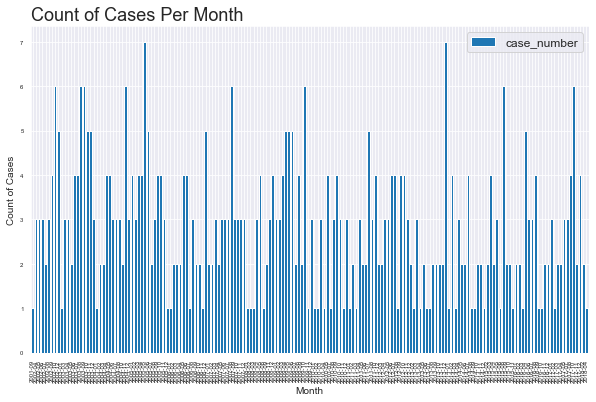

In [40]:
df.groupby('year_month').count().plot(y = 'case_number', 
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      fontsize=6,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 12})

plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

Number of crimes occuring on each day

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a Tuesday]')

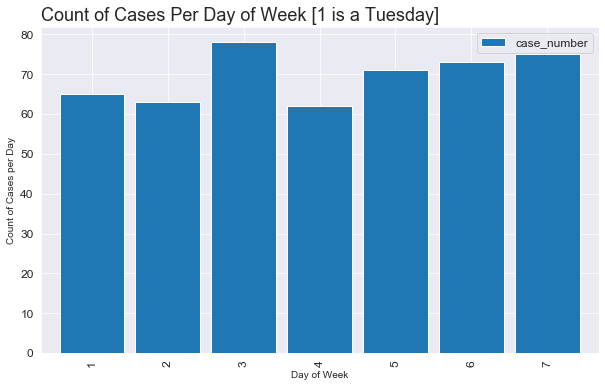

In [41]:
df.groupby('day').count().plot(y = 'case_number',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a Tuesday]', loc='left', fontsize=18)

There is a small increase in crime reported at the weekend, Saturday and Sunday, but nothing that couldbe considered significant.

<b>Number of crimes occuring in each hour</b>

Text(0.0, 1.0, 'Count of Cases Per Hour]')

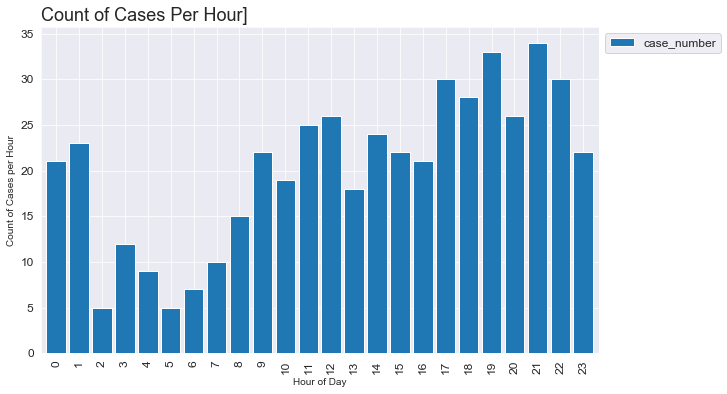

In [43]:
df.groupby('hour').count().plot(y = 'case_number',
                               kind='bar',
                               figsize=(10,6),
                               width=0.85,
                               fontsize=12,
                               colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                        prop={'size': 12})

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

There is an expected fall-off in reported crime rates after midnight before elevating again after eight in the morning.

Now let's look at the Crime Categories.

In [44]:
# Number of unique Crime categories bases on the  Description
df.description.nunique()

95

In [47]:
# What Crimes are the 3 most commonly occuring ones 
df[['description', 'case_number']].groupby(
    ['description'], as_index=False).count().sort_values('case_number', ascending=False).head(3)

,description,case_number
74,SIMPLE,49
0,$500 AND UNDER,44
27,DOMESTIC BATTERY SIMPLE,37


In [49]:
# Create a list of the 10 most commonly occuring crimes
top_crimes = df[['description', 'case_number']].groupby(
    ['description']).count().sort_values('case_number', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df[['description', 'case_number']].groupby(
    ['description']).count().sort_values('case_number', ascending=False)[:3].axes[0].tolist()

# Create a list of the 2 most commonly occuring crimes
top_two_crimes = df[['description', 'case_number']].groupby(
    ['description']).count().sort_values('case_number', ascending=False)[:2].axes[0].tolist()

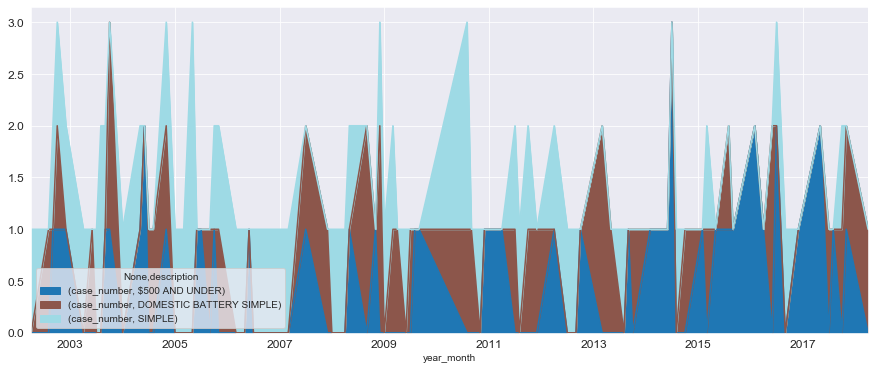

In [50]:
# Create a new data frame with just the top 10 crimes
df_top_crimes = df[df['description'].isin(top_crimes)].copy()

# Create a new data frame with just the top 10 crimes
df_top3_crimes = df[df['description'].isin(top_three_crimes)].copy()

df_top3_crimes[['case_number', 'description', 'year_month']].pivot_table(
    index='year_month', 
    columns='description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

Text(0.0, 1.0, 'Count of Cases Per Hour]')

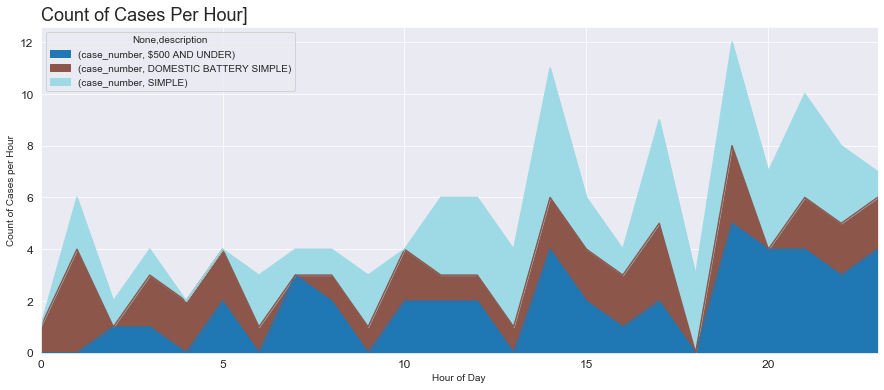

In [51]:
df_top3_crimes[['case_number', 'description', 'hour']].pivot_table(
    index='hour', 
    columns='description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                               fontsize=12,
                               colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

<b>Visual Crimes on map of Chicago</b>

In [52]:
df_top_crimes.dtypes

case_number            object
date           datetime64[ns]
block                  object
description            object
ward                  float64
latitude              float64
longitude             float64
hour                    int64
day_name               object
day                     int64
month_name             object
month                   int64
year                    int64
year_month          period[M]
zip                    object
street                 object
dtype: object

<b>Create a folium map with a different colour per crime</b>


Colour each of the top 10 crimes with a different and plot on a Folium map.

In [65]:
# Create a list of colours. 
# We have  list of the top 10 crimes from earlier
colors = ['red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black']
    


# Create a dictionary of colours to map to the crimes
dict_colours = dict(zip(df, colors))

# Add the colours colums to the df_top_crimes DataFrame
df['colour'] = df.description.map(dict_colours)

In [66]:
df_top_crimes_august = df_top_crimes[df_top_crimes.month_name == 'August']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top_crimes_august.to_pickle('crimes_august.pkl')

In [70]:
# Define Chicago's geolocation coordinates
chicago_latitude = 41.85  
chicago_longitude = -87.75

# Define the world map centered around Chicago with a higher zoom level
chicago_map = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top_crimes_august.latitude, 
                         df_top_crimes_august.longitude, 
                         df_top_crimes_august):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
chicago_map.add_child(incidents)

In [71]:
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
chicago_cluster = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.description))

chicago_cluster.add_child(mc)
chicago_cluster

In [72]:
from folium import plugins
from folium.plugins import HeatMap

chicago_heatmat = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top_crimes_august.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(chicago_heatmat)

# Display the map
chicago_heatmat

In [73]:
df_top_crimes.dtypes

case_number            object
date           datetime64[ns]
block                  object
description            object
ward                  float64
latitude              float64
longitude             float64
hour                    int64
day_name               object
day                     int64
month_name             object
month                   int64
year                    int64
year_month          period[M]
zip                    object
street                 object
dtype: object

<b>Data Preparation for Modelling</b>

Rather than removing colums from df_top_crimes a new df_features DataFrame will be created with just the required columns. 
This df_features DataFrame will then be processed to remove Categorical Data Types and replace them with One Hot encoding. 
Finally the Dependant Variables will be Normalised and Principal Component Analysis will be
used to reduce the dimensionality of the DataFrame.

In [75]:
# Start by copying the Latitude and Longitude to the new DataFrame
df_features = df_top_crimes[['latitude', 'longitude']]

# Next and One Hot Encoding of the hour, day and month variables
df_features = df_features.join(pd.get_dummies(df_top_crimes.hour, prefix='hour'))
df_features = df_features.join(pd.get_dummies(df_top_crimes.day_name))
df_features = df_features.join(pd.get_dummies(df_top_crimes.month_name))

# Finally add the ward & crimes column, copied from the original Primary Description column
df_features['ward'] = df_top_crimes[['ward']]
df_features['crimes'] = df_top_crimes[['description']]

In [76]:
df_features.head()

,latitude,longitude,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,ward,crimes
0,41.807441,-87.703956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14.0,FROM BUILDING
1,41.898280,-87.716406,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27.0,$500 AND UNDER
2,41.815933,-87.624642,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,$500 AND UNDER
4,41.773455,-87.706480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,15.0,$500 AND UNDER
5,41.896447,-87.644939,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,27.0,OVER $500


There are a couple of further small changes to be made:

1.Create a smaller DataFrame of only the top three crimes
2.Create the X, dependant variables, DataFrames by dropping the Crimes column
3.Create the y, independant variable,
4.Normailse the X Data

In [77]:
# Create a smaller DataFrame of only the top three crimes
df_features_3 = df_features[df_features['crimes'].isin(top_three_crimes)].copy()

# Create a smaller DataFrame of only the top two crimes
df_features_2 = df_features[df_features['crimes'].isin(top_two_crimes)].copy()

In [ ]:
#  Create the X, dependant variables, DataFrames by dropping the Crimes column
X_10 = df_features.copy()
y_10 = X_10.crimes.values

X_10.drop('crimes', axis=1, inplace=True)
X_10 = preprocessing.StandardScaler().fit(X_10).transform(X_10)


X_3 = df_features_3.copy()
y_3 = X_3.crimes.values

X_3.drop('crimes', axis=1, inplace=True)
X_3 = preprocessing.StandardScaler().fit(X_3).transform(X_3)

X_2 = df_features_2.copy()
y_2 = X_2.crimes.values

X_2.drop('crimes', axis=1, inplace=True)
X_2 = preprocessing.StandardScaler().fit(X_2).transform(X_2)

In [79]:
# Set X = X_10
X = X_10
y = y_10

In [ ]:
# Set X = X_3
X = X_3
y = y_3

<b>K Nearest Neighbor(KNN)</b>

Find the best k to build the model with the best accuracy.

Heighbours:  5   2019-10-23 20:44:00.088167
Heighbours:  6   2019-10-23 20:44:00.089167
Heighbours:  7   2019-10-23 20:44:00.089167
Heighbours:  8   2019-10-23 20:44:00.089167
Heighbours:  9   2019-10-23 20:44:00.089167
Heighbours:  10   2019-10-23 20:44:00.089167
Heighbours:  11   2019-10-23 20:44:00.090167


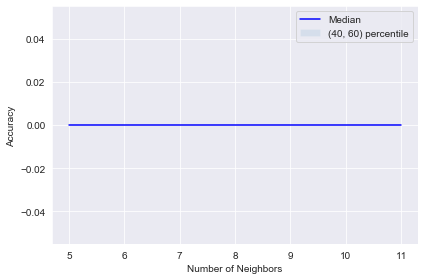

In [104]:
# Number of neighbours
from datetime import datetime
neighs = range(5, 12)

# Store the scores
scores = np.zeros((len(neighs), 3))
for idx, neigh in enumerate(neighs):
    print('Heighbours: ', neigh, ' ', str(datetime.now()))
   
    
    
   
      
    
    
plt.plot(neighs, scores[ : , 1], 'b')
plt.fill_between(neighs, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

Depth:  10   2019-10-23 20:40:24.854856
Depth:  11   2019-10-23 20:40:24.855856
Depth:  12   2019-10-23 20:40:24.855856
Depth:  13   2019-10-23 20:40:24.855856
Depth:  14   2019-10-23 20:40:24.855856
Depth:  15   2019-10-23 20:40:24.855856


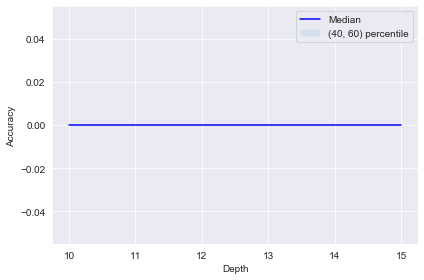

In [101]:
# Decision Tree
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

depths = range(10, 16)
scores = np.zeros((len(depths), 3))
# scores = np.zeros((len(depths), 2))
for idx, depth in enumerate(depths):
    print('Depth: ', depth, ' ', str(datetime.now()))
    model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    

plt.plot(depths, scores[ : , 1], 'b')
plt.fill_between(depths, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()


Alpha:  0.1   2019-10-23 20:51:55.112337
Alpha:  0.2   2019-10-23 20:51:55.120337
Alpha:  0.30000000000000004   2019-10-23 20:51:55.121337
Alpha:  0.4   2019-10-23 20:51:55.122337
Alpha:  0.5   2019-10-23 20:51:55.122337
Alpha:  0.6   2019-10-23 20:51:55.122337
Alpha:  0.7000000000000001   2019-10-23 20:51:55.122337
Alpha:  0.8   2019-10-23 20:51:55.122337
Alpha:  0.9   2019-10-23 20:51:55.122337
Alpha:  1.0   2019-10-23 20:51:55.122337


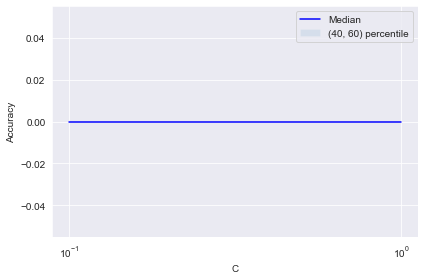

In [120]:
def cross_validate_02(model, n_splits = 10):
    
    alpha = np.linspace(0.1, 1, num=10)
    scores = np.zeros((len(alpha), 3))
for idx, a in enumerate(alpha):
    print('Alpha: ', a, ' ', str(datetime.now()))
    
    

plt.plot(alpha, scores[ : , 1], 'b')
plt.xscale('log')
plt.fill_between(alpha, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.tight_layout()
plt.show()

<b>Import and Process FourSquare Data</b>

In [160]:
import requests

page = requests.get("https://foursquare.com/explore?mode=url&near=Chicago%2C%20IL%2C%20United%20States&nearGeoId=72057594042815334&q=Top%20Picks")

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
top_venues = soup.find_all('div', class_='venueDetails')

In [161]:
CLIENT_ID = 'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your-client-ID
CLIENT_SECRET:your-client-secret


In [163]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'SJVNROHFKAQ0CZ5ULIM0V5K5IXUPI2UV1FARMVENUHS3HB4F'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='W1H0JXEDQWHBWX1ZZYT2IXCRTWLGPSNQ2NOGQ5IA4ZKCQKEU' # Foursquare Secret, note there is a daily call quota it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [164]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'FM32E0UU4KR1WU4VZIG1F5G1J2XFMKEGNF52UGPTSQ1J1CF1'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='R5SUZ4FBHNDVUMHP15ZKFIKI5VCQBLGPYSFGZY2LYQXMILX2' # Foursquare Secret, note there is a daily call quota it it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [165]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [166]:
# get new york data
new_york_data=get_new_york_data()

In [167]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [168]:
# prepare neighborhood list that contains indian restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:1
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:1
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
( 10 / 306 ) Indian Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Indian Resturants in Baychester, Bronx:0
( 12 / 306 ) Indian Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Indian Resturants in City Island, Bronx:0
( 14 / 306 ) Indian Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Indian Resturants in University Heights, Bronx:0
( 16 / 306 ) Indian Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Indian Resturants in Fordham, Bronx:0
( 18 / 306 ) Indian Resturants in East Tremont, Bronx:0
( 19 / 306 ) Ind

( 143 / 306 ) Indian Resturants in Maspeth, Queens:0
( 144 / 306 ) Indian Resturants in Ridgewood, Queens:1
( 145 / 306 ) Indian Resturants in Glendale, Queens:0
( 146 / 306 ) Indian Resturants in Rego Park, Queens:1
( 147 / 306 ) Indian Resturants in Woodhaven, Queens:0
( 148 / 306 ) Indian Resturants in Ozone Park, Queens:1
( 149 / 306 ) Indian Resturants in South Ozone Park, Queens:2
( 150 / 306 ) Indian Resturants in College Point, Queens:0
( 151 / 306 ) Indian Resturants in Whitestone, Queens:0
( 152 / 306 ) Indian Resturants in Bayside, Queens:3
( 153 / 306 ) Indian Resturants in Auburndale, Queens:0
( 154 / 306 ) Indian Resturants in Little Neck, Queens:0
( 155 / 306 ) Indian Resturants in Douglaston, Queens:0
( 156 / 306 ) Indian Resturants in Glen Oaks, Queens:4
( 157 / 306 ) Indian Resturants in Bellerose, Queens:0
( 158 / 306 ) Indian Resturants in Kew Gardens Hills, Queens:0
( 159 / 306 ) Indian Resturants in Fresh Meadows, Queens:0
( 160 / 306 ) Indian Resturants in Briarw

( 280 / 306 ) Indian Resturants in Fulton Ferry, Brooklyn:0
( 281 / 306 ) Indian Resturants in Vinegar Hill, Brooklyn:0
( 282 / 306 ) Indian Resturants in Weeksville, Brooklyn:0
( 283 / 306 ) Indian Resturants in Broadway Junction, Brooklyn:0
( 284 / 306 ) Indian Resturants in Dumbo, Brooklyn:0
( 285 / 306 ) Indian Resturants in Manor Heights, Staten Island:0
( 286 / 306 ) Indian Resturants in Willowbrook, Staten Island:0
( 287 / 306 ) Indian Resturants in Sandy Ground, Staten Island:0
( 288 / 306 ) Indian Resturants in Egbertville, Staten Island:0
( 289 / 306 ) Indian Resturants in Roxbury, Queens:0
( 290 / 306 ) Indian Resturants in Homecrest, Brooklyn:0
( 291 / 306 ) Indian Resturants in Middle Village, Queens:0
( 292 / 306 ) Indian Resturants in Prince's Bay, Staten Island:0
( 293 / 306 ) Indian Resturants in Lighthouse Hill, Staten Island:0
( 294 / 306 ) Indian Resturants in Richmond Valley, Staten Island:0
( 295 / 306 ) Indian Resturants in Malba, Queens:0
( 296 / 306 ) Indian Re

In [170]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,4c04544df423a593ac83d116,Cumin Indian Cuisine
1,Bronx,Kingsbridge,4c04544df423a593ac83d116,Cumin Indian Cuisine
2,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
3,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
4,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine


In [171]:
indian_rest_ny.shape


(150, 4)

In [172]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
103,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
104,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
105,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
106,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
107,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
108,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
109,Queens,Floral Park,4c953a7672dd224bd8d1a191,Real Usha Sweets & Snacks Inc.
110,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
111,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


In [173]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.5     9
( 1 / 150 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.5     9
( 2 / 150 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      4     7.6    11
( 3 / 150 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.0     2
( 4 / 150 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.5     9
( 5 / 150 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     6.8     3
( 6 / 150 ) processed
                         ID             

No data available for id= 523b2b42498e1dfabcc8ab15
( 56 / 150 ) processed
No data available for id= 5b770657c0cacb002c89bc63
( 57 / 150 ) processed
No data available for id= 4aa56c81f964a5204e4820e3
( 58 / 150 ) processed
No data available for id= 4afdcf29f964a520162b22e3
( 59 / 150 ) processed
No data available for id= 4c7060e734443704ca0e245f
( 60 / 150 ) processed
No data available for id= 4b998d3ff964a520fc8235e3
( 61 / 150 ) processed
No data available for id= 4b189424f964a52043d423e3
( 62 / 150 ) processed
No data available for id= 49ebb18ff964a52016671fe3
( 63 / 150 ) processed
No data available for id= 3fd66200f964a52009f11ee3
( 64 / 150 ) processed
No data available for id= 527d9cbc498edf0db10bde6b
( 65 / 150 ) processed
No data available for id= 4afdcf29f964a520162b22e3
( 66 / 150 ) processed
No data available for id= 4b998d3ff964a520fc8235e3
( 67 / 150 ) processed
No data available for id= 49ebb18ff964a52016671fe3
( 68 / 150 ) processed
No data available for id= 3fd66200f964

In [174]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.5,9
1,Bronx,Kingsbridge,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.5,9
2,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,4,7.6,11
3,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,6.0,2
4,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.5,9


In [175]:
indian_rest_ny.shape

(150, 4)

In [176]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
Borough         150 non-null object
Neighborhood    150 non-null object
ID              150 non-null object
Name            150 non-null object
Likes           150 non-null object
Rating          150 non-null float64
Tips            150 non-null object
dtypes: float64(1), object(6)
memory usage: 8.3+ KB
